<a href="https://colab.research.google.com/github/GASKAP/SPARK/blob/master/synthetic_obs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Synthetic observation of the 21cm line from numerical simulation

##Install SPARK package

In [1]:
!rm -rf SPARK
!git clone https://github.com/GASKAP/SPARK
import os
os.chdir('SPARK')
!pip install .

Cloning into 'SPARK'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 91 (delta 43), reused 56 (delta 17), pack-reused 0
Unpacking objects: 100% (91/91), done.
Processing /content/SPARK
  Created wheel for SPARK: filename=SPARK-0.1.0-cp36-none-any.whl size=12607 sha256=859508f60f864f7d7702bd33a7404724f72d05f3d12c644b9c2a189ba600660d
  Stored in directory: /tmp/pip-ephem-wheel-cache-42yikd5v/wheels/39/ed/c6/1279a6dcc287cac6180c36e7b9b406799939d276a9c59984f9
Successfully built SPARK
  Found existing installation: SPARK 0.1.0
    Uninstalling SPARK-0.1.0:
      Successfully uninstalled SPARK-0.1.0


##Import packages

In [0]:
import numpy as np
from astropy.io import fits
import astropy.table as pytabs
import matplotlib.pyplot as plt

from SPARK.synthetic import synth

##Generate synthetic observation

In [3]:
    # Open data                                                                                                                                                                                                                                                               
    path = 'data/'

    hdu_list_rho = fits.open(path + 'rho_cube_sample.fits')
    hdu_list_T = fits.open(path + 'T_cube_sample.fits')
    hdu_list_vz = fits.open(path + 'vz_cube_sample.fits')

    #Velocity range and channel spacing                                                                                                                                                                                                                                       
    vmin = -40 #km.s-1                                                                                                                                                                                                                                                        
    vmax = 40 #km.s-1                                                                                                                                                                                                                                                         
    dv = 0.8 #km.s-1                                                                                                                                                                                                                                                        

    rho_cube = hdu_list_rho[0].data #g.cm-3                                                                                                                                                                                                                                   
    T_cube = hdu_list_T[0].data #K                                                                                                                                                                                                                                            
    vz_cube = hdu_list_vz[0].data #m.s-1                                                                                                                                                                                                                                      

    core = synth(rho=rho_cube, T=T_cube, vz=vz_cube)
    cube = core.gen(vmin=vmin, vmax=vmax, dv=dv, thin=False)
    cube_thin = core.gen(vmin=vmin, vmax=vmax, dv=dv, thin=True)


100%|██████████| 101/101 [00:03<00:00, 30.51it/s]


##Plot synthetic obs

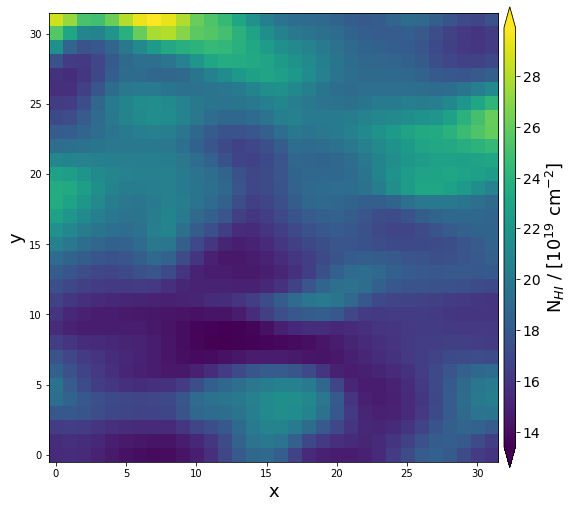

In [4]:
NHI = np.sum(cube,0) * dv * core.C.value / 1.e19

#Plot integrated column density field TOT                                                                                                                                                                                                                                     
fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0.1,0.1,0.78,0.8])
ax.set_xlabel(r"x", fontsize=18.)
ax.set_ylabel(r"y", fontsize=18.)
img = ax.imshow(NHI, origin="lower")
colorbar_ax = fig.add_axes([0.89, 0.1, 0.02, 0.8])
cbar = fig.colorbar(img, cax=colorbar_ax, extend='both')
cbar.ax.tick_params(labelsize=14.)
cbar.set_label(r"N$_{HI}$ / [10$^{19}$ cm$^{-2}$]", fontsize=18.)
# plt.savefig("plot/" + 'NHI.png', format='png', bbox_inches='tight', 
#             pad_inches=0.02)




[None, None, None, None]

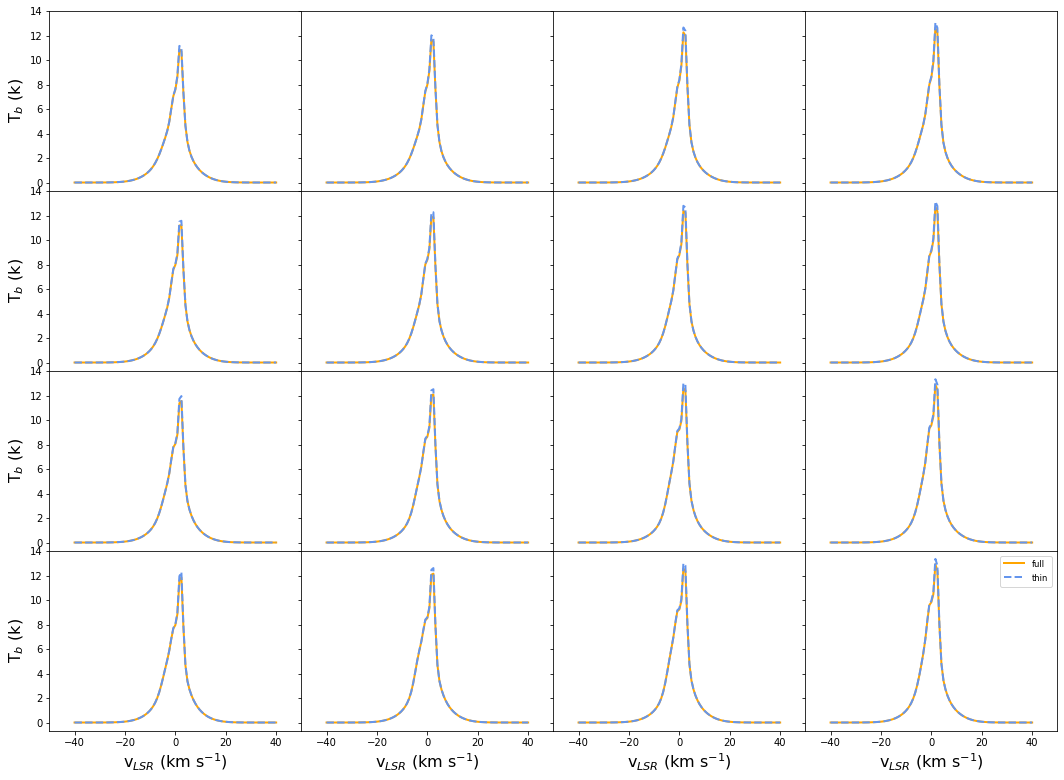

In [16]:
v = np.arange(vmin,vmax+dv, dv)

#Plot mosaic spectra                                                                                                                                                                                                                                                          
def norm(pval):
    return (pval - pmin) / float(pmax - pmin)

ny = 4; nx = 4
center_y = 16; center_x = 16
fig, axs = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(14.,10.))
fig.subplots_adjust(hspace=0, wspace=0, left=0, right=1, top=1, bottom=0)
for i in np.arange(ny):
    for j in np.arange(nx):
        axs[i][j].set_xlim([-50,50])
        axs[i][j].plot(v, cube[:,center_y+i,center_x+j], color='orange', 
                       linewidth=2., label="full")
        axs[i][j].plot(v, cube_thin[:,center_y+i,center_x+j], "--", 
                       color='cornflowerblue', linewidth=2., label="thin")
        if j == 0: axs[i][j].set_ylabel(r'T$_b$ (k)', fontsize=16)
        axs[i][j].set_xlabel(r'v$_{LSR}$ (km s$^{-1}$)', fontsize=16)
plt.legend(loc = 1, numpoints = 1)
leg = plt.gca().get_legend()
ltext  = leg.get_texts()
plt.setp(ltext, fontsize = 'small')
# plt.savefig("plot/" + 'mosaic_spectra.png', format='png', bbox_inches='tight', 
#             pad_inches=0.02)
